In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv("data/stocks/AAPL.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Close']]


In [3]:
for i in range(1, 21):
    df[f'Close_{i}'] = df['Close'].shift(i)

df.dropna(inplace=True)

X = df[[f'Close_{i}' for i in range(1, 21)]].values
y = df['Close'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [6]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f"[Linear Regression] MSE: {lr_mse:.2f}")
print(f"[Linear Regression] R²: {lr_r2:.4f}")

[Linear Regression] MSE: 9.06
[Linear Regression] R²: 0.9973


In [10]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"[Random Forest] MSE: {rf_mse:.4f}")
print(f"[Random Forest] R² Score: {rf_r2:.4f}")

[Random Forest] MSE: 5508.9300
[Random Forest] R² Score: -0.6525


In [11]:
rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"[Random Forest FIXED] MSE: {rf_mse:.2f}")
print(f"[Random Forest FIXED] R²: {rf_r2:.4f}")

[Random Forest FIXED] MSE: 5488.18
[Random Forest FIXED] R²: -0.6463


In [12]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y, shuffle=False, test_size=0.2)

In [13]:
nn_model = Sequential([
    Dense(64, input_dim=20, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
nn_model.fit(X_train_nn, y_train_nn, epochs=50, batch_size=16, validation_split=0.1, verbose=0)

nn_pred = nn_model.predict(X_test_nn).flatten()

nn_mse = mean_squared_error(y_test_nn, nn_pred)
nn_r2 = r2_score(y_test_nn, nn_pred)

print(f"[Neural Network] MSE: {nn_mse:.2f}")
print(f"[Neural Network] R²: {nn_r2:.4f}")

C:\Users\widya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[Neural Network] MSE: 402.31
[Neural Network] R²: 0.8793


In [14]:
def weighted_moving_average(data, weights):
    window_size = len(weights)
    predictions = []
    for i in range(len(data) - window_size):
        window = data[i:i + window_size]
        prediction = np.dot(window, weights)
        predictions.append(prediction)
    return predictions

weights = np.array([0.05, 0.1, 0.15, 0.2, 0.2, 0.3])
prices = df['Close'].values

custom_pred = weighted_moving_average(prices, weights)
actual = prices[len(weights):]

custom_mse = mean_squared_error(actual, custom_pred)
custom_r2 = r2_score(actual, custom_pred)

print(f"[Custom Method] MSE: {custom_mse:.2f}")
print(f"[Custom Method] R²: {custom_r2:.4f}")

[Custom Method] MSE: 2.64
[Custom Method] R²: 0.9992


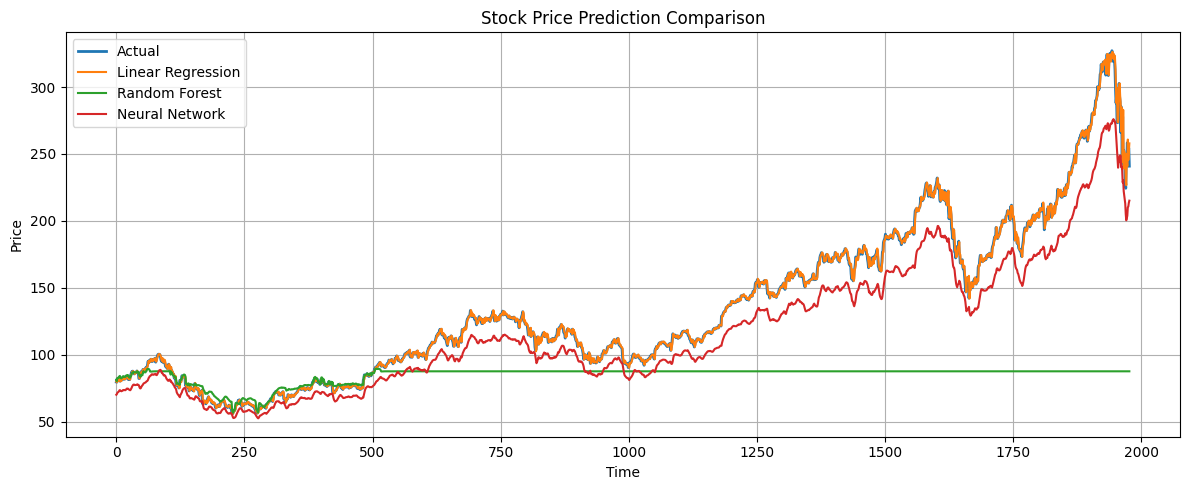

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(lr_pred, label='Linear Regression')
plt.plot(rf_pred, label='Random Forest')
plt.plot(nn_pred, label='Neural Network')
plt.title("Stock Price Prediction Comparison")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()